<h1>Étude de Santé Publique</h1>
<h3>Par valentin Monteiro</h3>

<h2>Import des library </h2>

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

<h2>Import des Dataframe</h2>
<p><span style="color: rgb(251, 160, 38);"><strong>df_aa</strong> = aide alimentaire</span><br>
<div style="margin-left: 20px;">
<p>Un fichier d&rsquo;aide alimentaire qui contient :</p>
<ul>
    <li>Le pays b&eacute;n&eacute;ficiaire.</li>
    <li>L&rsquo;ann&eacute;e.</li>
    <li>Le produit.</li>
    <li>La quantit&eacute; qui a &eacute;t&eacute; donn&eacute;e comme aide alimentaire, en tonnes.</li>
</ul>
</div>
   <span style="color: rgb(251, 160, 38);"><strong>df_da</strong> = dispo alimentaire</span><br><br>
<div style="margin-left: 20px;">    
<p>Un fichier de disponibilit&eacute; alimentaire pour l&rsquo;ann&eacute;e 2017 qui contient 17 variables :</p>
<ul>
    <li>Le pays.</li>
    <li>Le produit.</li>
    <li>4 variables de disponibilit&eacute; alimentaire. Ces 4 variables sont exprim&eacute;es dans des unit&eacute;s bien sp&eacute;cifiques, qui sont pr&eacute;cis&eacute;es directement dans le nom de la variable. &Agrave; noter cependant que la notation <em>kcal</em> est un abus de langage, elle correspond &agrave; une calorie r&eacute;elle.</li>
    <li>10 variables qui pr&eacute;cisent les utilisations/moyens d&rsquo;acquisition de la disponibilit&eacute; alimentaire. Elles sont toutes exprim&eacute;es en <strong>milliers de tonnes</strong>.</li>
    <li>Enfin, une variable type qui pr&eacute;cise si le produit est d&rsquo;origine animale ou v&eacute;g&eacute;tale.</li>
</ul>
</div>
<span style="color: rgb(251, 160, 38);"><strong>df_p</strong> = population<br></span>
<div style="margin-left: 20px;">
    <p>Un fichier de population qui inclut :</p>
<ul>
    <li>Le pays.</li>
    <li>L&rsquo;ann&eacute;e.</li>
    <li>La population du pays, exprim&eacute;e en milliers d&rsquo;habitants.</li>
</ul>
</div>
<span style="color: rgb(251, 160, 38);"><strong>df_sn</strong> = sous nutrition</span></p>
<div style="margin-left: 20px;">
    <p>Un fichier d&rsquo;ins&eacute;curit&eacute; alimentaire, qui inclut :</p>
<ul>
    <li>Le pays.</li>
    <li>Intervalle d&rsquo;ann&eacute;es.</li>
    <li>Le&nbsp;nombre de personnes en sous-alimentation en millions d&rsquo;habitants&nbsp;(ex. : pour l&rsquo;intervalle 2016-2018, le nombre de personnes correspond &agrave; la moyenne sur ces 3 ann&eacute;es, on peut le r&eacute;sumer en 2017).</li>
</ul>
</div>


In [2]:
df_aa = pd.read_csv("aide_alimentaire.csv")
df_da = pd.read_csv("dispo_alimentaire.csv")
df_p = pd.read_csv("population.csv")
df_sn = pd.read_csv("sous_nutrition.csv")

<h2>Nettoyage du dataframe Sous Nutrition</h2>

In [3]:
df_sn = df_sn[df_sn["Valeur"].notnull()]
df_sn2017 = df_sn[(df_sn["Année"] == "2016-2018") == True]
df_sn2017 = df_sn2017[(df_sn2017["Valeur"] == "<0.1") == False]

<h2>Nettoyage du dataframe Population</h2>

In [4]:
df_p2017=df_p[(df_p["Année"] == 2017) == True]

<h2>Declaration des variables</h2>

In [5]:
population_total = sum(df_p2017.Valeur)
population_sn = sum(df_sn2017.Valeur.astype(float))*1000

In [6]:
taux = (population_sn*100)/population_total

<h2>Proportion de personnes en état de sous-nutrition</h2>

In [7]:
print(taux)

7.097118203283067


le nombre théorique de personnes qui pourraient être nourries. Tu devrais pouvoir calculer ça à partir de la disponibilité alimentaire mondiale ;

In [8]:
df_da

,Zone,Produit,Origine,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
0,Afghanistan,Abats Comestible,animale,NaN,NaN,5.0,1.72,0.20,0.77,53.0,NaN,NaN,53.0,NaN,53.0,NaN,NaN,NaN
1,Afghanistan,"Agrumes, Autres",vegetale,NaN,NaN,1.0,1.29,0.01,0.02,41.0,2.0,40.0,39.0,2.0,3.0,NaN,NaN,NaN
2,Afghanistan,Aliments pour enfants,vegetale,NaN,NaN,1.0,0.06,0.01,0.03,2.0,NaN,2.0,2.0,NaN,NaN,NaN,NaN,NaN
3,Afghanistan,Ananas,vegetale,NaN,NaN,0.0,0.00,NaN,NaN,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
4,Afghanistan,Bananes,vegetale,NaN,NaN,4.0,2.70,0.02,0.05,82.0,NaN,82.0,82.0,NaN,NaN,NaN,NaN,NaN
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15600,Îles Salomon,Viande de Suides,animale,NaN,NaN,45.0,4.70,4.28,1.41,3.0,NaN,0.0,3.0,NaN,2.0,NaN,NaN,NaN
15601,Îles Salomon,Viande de Volailles,animale,NaN,NaN,11.0,3.34,0.69,1.14,2.0,NaN,2.0,2.0,NaN,0.0,NaN,NaN,NaN
15602,Îles Salomon,"Viande, Autre",animale,NaN,NaN,0.0,0.06,NaN,0.04,0.0,NaN,0.0,0.0,NaN,NaN,NaN,NaN,NaN
15603,Îles Salomon,Vin,vegetale,NaN,NaN,0.0,0.07,NaN,NaN,0.0,0.0,0.0,0.0,NaN,NaN,NaN,NaN,NaN


In [9]:
df_da_z = df_da.groupby("Zone").sum()
df_da_z

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,768.0,415.0,2087.0,351.41,33.50,58.26,13515.0,278.0,2988.0,10735.0,1135.0,11171.0,395.0,63.0,-368.0
Afrique du Sud,5309.0,876.0,3020.0,564.80,83.58,85.33,61256.0,11674.0,7517.0,29812.0,2193.0,63263.0,253.0,22819.0,2153.0
Albanie,660.0,174.0,3188.0,1095.54,106.48,111.37,4758.0,94.0,933.0,3476.0,276.0,3964.0,55.0,113.0,-45.0
Algérie,4352.0,1707.0,3293.0,809.13,76.48,91.92,42630.0,655.0,17403.0,31729.0,3753.0,26359.0,449.0,637.0,-479.0
Allemagne,30209.0,7711.0,3503.0,957.52,141.62,101.39,162275.0,57431.0,65353.0,79238.0,3781.0,154547.0,1551.0,39842.0,-192.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2689.0,3275.0,700.24,87.16,104.51,11850.0,4343.0,15327.0,6548.0,705.0,1192.0,3.0,804.0,-327.0
Équateur,1200.0,1909.0,2346.0,544.91,94.64,61.30,18614.0,8002.0,1725.0,8574.0,707.0,24337.0,138.0,6200.0,557.0
États-Unis d'Amérique,148432.0,154699.0,3682.0,1002.39,161.37,109.42,777992.0,163524.0,81887.0,320889.0,7162.0,894668.0,10403.0,141010.0,-35032.0


<h2>Résultat requête 2</h2>

In [10]:
df_dap = df_da_z.merge(df_p2017, how="inner", left_on="Zone", right_on="Zone")
nb_theorique = (sum(df_dap["Disponibilité alimentaire (Kcal/personne/jour)"]*df_dap["Valeur"]))/2500
nb_theorique

8367593.850932399

In [11]:
df_da_v = df_da[df_da["Origine"] == "vegetale"]
#df_da_v = df_da_v == True
df_da_v = df_da_v.groupby("Zone").sum()
df_da_v

,Aliments pour animaux,Autres Utilisations,Disponibilité alimentaire (Kcal/personne/jour),Disponibilité alimentaire en quantité (kg/personne/an),Disponibilité de matière grasse en quantité (g/personne/jour),Disponibilité de protéines en quantité (g/personne/jour),Disponibilité intérieure,Exportations - Quantité,Importations - Quantité,Nourriture,Pertes,Production,Semences,Traitement,Variation de stock
Zone,,,,,,,,,,,,,,,
Afghanistan,645.0,415.0,1871.0,271.49,18.27,46.05,10884.0,278.0,2638.0,8293.0,1072.0,8891.0,393.0,63.0,-368.0
Afrique du Sud,5122.0,761.0,2533.0,425.17,48.92,48.94,53439.0,10586.0,6468.0,22441.0,2110.0,55649.0,186.0,22819.0,1912.0
Albanie,559.0,172.0,2203.0,706.49,38.76,51.96,3326.0,84.0,846.0,2241.0,182.0,2609.0,55.0,113.0,-45.0
Algérie,4352.0,1706.0,2915.0,632.35,54.12,66.94,35510.0,649.0,14672.0,24797.0,3587.0,21964.0,428.0,637.0,-479.0
Allemagne,28122.0,6842.0,2461.0,568.82,63.63,39.90,126866.0,34454.0,50642.0,47079.0,3717.0,110926.0,1475.0,39686.0,-247.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
Émirats arabes unis,1174.0,2619.0,2718.0,473.18,53.00,62.81,9623.0,3326.0,12546.0,4426.0,675.0,780.0,0.0,804.0,-376.0
Équateur,1001.0,1905.0,1732.0,327.21,49.48,24.80,14926.0,7142.0,1475.0,5149.0,654.0,20042.0,125.0,6200.0,555.0
États-Unis d'Amérique,145289.0,145102.0,2698.0,590.68,93.68,39.65,632023.0,140442.0,69522.0,189122.0,6937.0,740194.0,9030.0,140986.0,-37242.0


<h2>Résultat requête 3</h2>

In [12]:
df_dap_v = df_da_v.merge(df_p2017, how="inner", left_on="Zone", right_on="Zone")
nb_theorique_v = (sum(df_dap_v["Disponibilité alimentaire (Kcal/personne/jour)"]*df_dap_v["Valeur"]))/2500
nb_theorique_v

6904305.684600402

In [13]:
#df_da_clean =df_da_z.drop(, axis=1)

<p> S'inspirer de la requête 2

In [14]:
s_da = df_da_z.sum()

In [18]:
s_da
dispo_int = s_da["Disponibilité intérieure"]
s_da = s_da.drop(["Disponibilité intérieure","Disponibilité alimentaire (Kcal/personne/jour)","Disponibilité alimentaire en quantité (kg/personne/an)","Disponibilité de matière grasse en quantité (g/personne/jour)","Disponibilité de protéines en quantité (g/personne/jour)"])

In [35]:
s_da_u = s_da.drop(["Exportations - Quantité","Importations - Quantité","Production","Variation de stock"])
s_da_u

Aliments pour animaux    1304245.0
Autres Utilisations       865023.0
Nourriture               4876258.0
Pertes                    453698.0
Semences                  154681.0
Traitement               2204687.0
dtype: float64

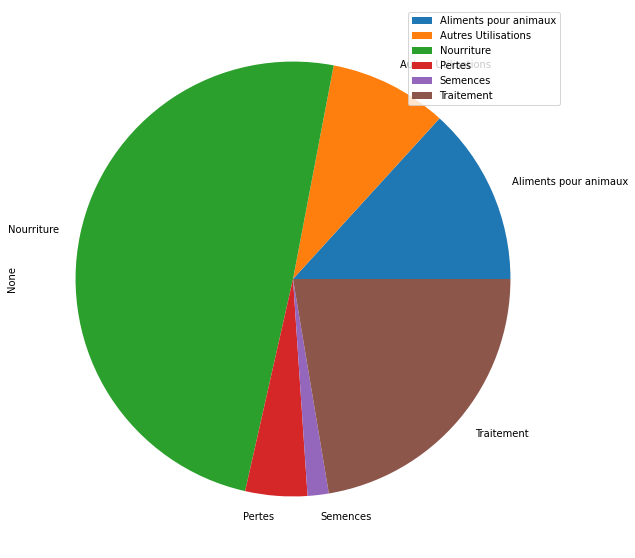

In [36]:
utilisation = s_da_u.plot.pie(y = "index", legend = True, figsize = (10, 10))